# Reservoir size and prediction quality

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from echo import esn
import time

.................................................
Elapsed: 103.66 s


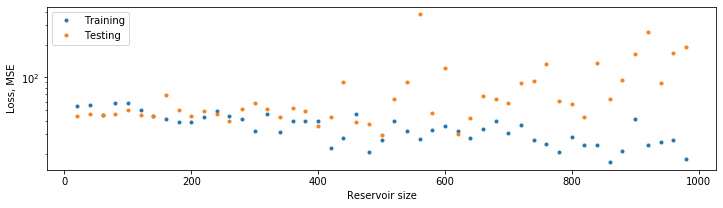

In [7]:
data = esn.Data.create_source('lorenz')

points_to_skip = 300
training_signal_length = 20000
test_length = 500

n_units_array = np.arange(20, 1000, 20, dtype=int)

loss = np.zeros((len(n_units_array),2)) # Training and testing losses

t = time.time()
for i in range(len(n_units_array)):
    model = esn.Reservoir(n_units_array[i], network_type='erdos')

    x,y = data.generate(points_to_skip + training_signal_length, sampling_step=0.02, seed=0)
    model.fit(x, y, skip=points_to_skip)

    # Training data loss    
    z = model.predict(x, length=points_to_skip+test_length)     
    loss[i,0] = esn.utils.loss(y[points_to_skip:(points_to_skip+test_length)], z[points_to_skip:])
    
    # Now generate new data, predict on it, calculate testing loss
    # seed = np.random.uniform()
    seed = 1
    x,y = data.generate(2000, sampling_step=0.02, seed=seed)
    z = model.predict(x, length=points_to_skip+test_length)     
    loss[i,1] = esn.utils.loss(y[points_to_skip:(points_to_skip+test_length)], z[points_to_skip:])
    
    print('.', end='')

print(f'\nElapsed: {time.time() - t:4.2f} s')

    
plt.figure(figsize=(12,3));
plt.plot(n_units_array, loss, '.');
plt.yscale('log')
plt.xlabel('Reservoir size');
plt.ylabel('Loss, MSE');
plt.legend(labels=['Training', 'Testing']);

For WS networks, testing loss goes up, which does not make much sense. For Erdos it mostly stays flat, buttowards the end also goes up a bit. Because at the same time training loss goes down, we probably  have a case of overfitting here. The network goes for small effects, that don't replicate in testing data. 

Do we need to use ridge regression? We're obviously overfitting here...